In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy import optimize
import math

C:\Users\24253\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
C:\Users\24253\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


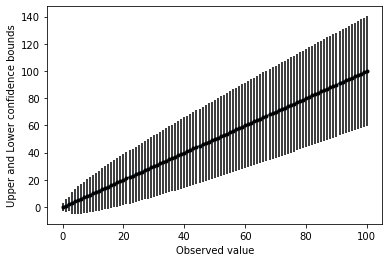

In [3]:
def GetConfidenceInterval(x,alpha=0.05):
    if x == 0:
        L = 0
        U = -math.log(alpha)
    else:
        def fl(_lambda_):
            return st.poisson.cdf(x,_lambda_)-alpha/2
        lambdas_upper = x+(1+math.sqrt(2*x*alpha+1))/alpha
        U = optimize.fsolve(fl,x)
        def fu(_lambda_):
            return 1-st.poisson.cdf(x-1,_lambda_)-alpha/2
        L = optimize.fsolve(fu,x)
    return [L,U]
m = 100
x = np.arange(m+1)
LU = np.zeros((m+1,2))
for k in range(m+1):
    temp = GetConfidenceInterval(k)
    LU[k,0] = temp[0]
    LU[k,1] = temp[1]
plt.plot(x,x)
plt.xlabel('Observed value');
plt.ylabel('Upper and Lower confidence bounds');
plt.errorbar(x, x, yerr=LU[...,1]-LU[...,0], fmt='.k')
plt.show()

In [4]:
def GeneratePoissonSample(a,b):
    N = np.random.poisson(100*(b-a), 1)
    X = np.random.uniform(a, b, N)
    Y = np.random.uniform(0, 2, N)
    return (sorted(X[(Y <= np.sin(2*math.pi*(X-a)/(b-a))+1)]))
GeneratePoissonSample(1,8)

[1.0156855912203455,
 1.0286191911548246,
 1.0352422293292998,
 1.0426274679780703,
 1.0677433032626729,
 1.0897673565169783,
 1.1245250546369725,
 1.1485604483582863,
 1.1578951366463701,
 1.16674553036271,
 1.1772270611500184,
 1.1784556036870624,
 1.180182973499019,
 1.2296240704572838,
 1.2481679541692485,
 1.2511506093142126,
 1.2525523374731655,
 1.2632016153580259,
 1.2755555182188052,
 1.2757305500850251,
 1.3011983620100234,
 1.3047268585958274,
 1.3052535607978755,
 1.3120714572879753,
 1.3275170167772197,
 1.3421667084034388,
 1.350771152503734,
 1.3704884343114214,
 1.393246916878299,
 1.398401736499799,
 1.4090940340095157,
 1.4149258318709426,
 1.4398072159373987,
 1.4441157762141192,
 1.4573307079154967,
 1.4717219804724007,
 1.4829163127815488,
 1.4870443250813774,
 1.4926926407793988,
 1.4955859058492402,
 1.4958568469663875,
 1.5129651483491005,
 1.5300335004898737,
 1.5484598666361467,
 1.5600983562305588,
 1.6146556922310689,
 1.6253499485329885,
 1.628905138691738,

In [61]:
def IntervalCount(Lud1,n,a,b): 
    Lud2 = np.zeros(n)
    if (n==1):
        Lud2[0] = len(Lud1)
    else:
        for i in range(n):
            lower = a + i*(b-a)/n
            upper = lower + (b-a)/n
            for j in range(len(Lud1)):
                if((Lud1[j]>=lower)&(Lud1[j]<upper)):
                    Lud2[i]=Lud2[i]+1
    
    return(Lud2)

  

In [64]:
def ConfidenceIntervals2(lud2): 
    U = np.zeros(len(lud2))
    L = np.zeros(len(lud2))
    for i in range(len(lud2)):
        a=lud2[i]
        UL =GetConfidenceInterval(a)
        U[i] = UL[1]
        L[i] = UL[0]
    return np.array([L,U])


C:\Users\24253\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
C:\Users\24253\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\24253\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:596: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
C:\Users\24253\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


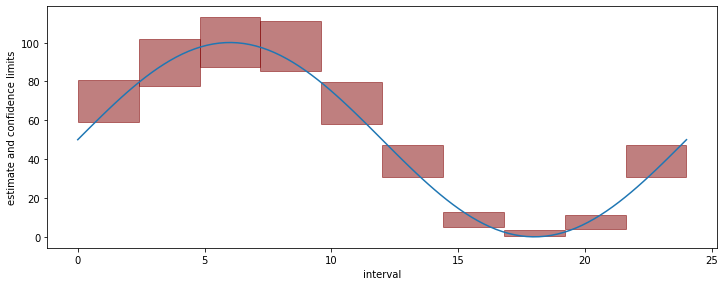

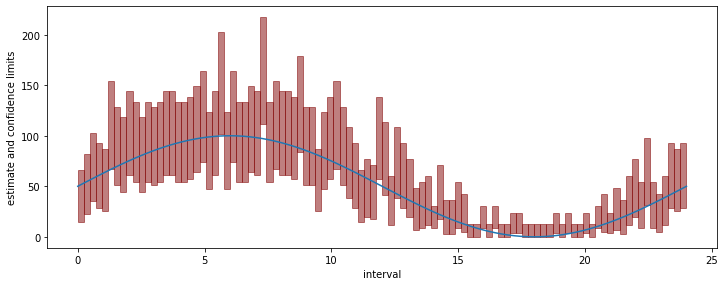

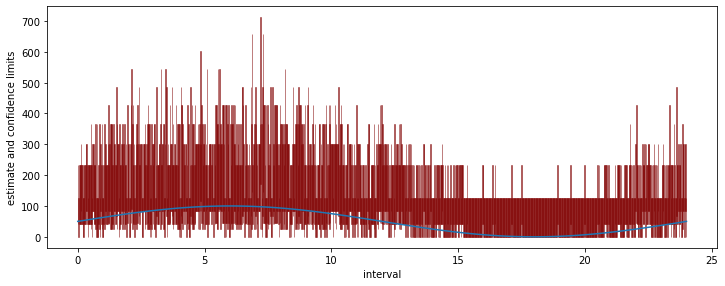

In [89]:
a = 0
b = 24
lud1 = GeneratePoissonSample(a, b)
t = np.linspace(a, b, 100)
_lambda_ = 50 * (np.sin(2*math.pi*(t-a)/(b-a))+1)

def DoOnePlot(n):
    lud2 = IntervalCount(lud1, n, a, b)
    lud3 = ConfidenceIntervals2(lud2)
    est = lud2 * n/(b-a)
    LU = lud3 * n/(b-a)
    fig = plt.figure(figsize=(12,16))
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    ax1 = plt.subplot(311)
    plt.plot(t, _lambda_)
    plt.xlabel("interval")
    plt.ylabel("estimate and confidence limits")
    for i in range(n):
        x0 = a + (b-a) * (i) / n
        x1 = a + (b-a) * (i+1) / n
        ax1.add_patch(plt.Rectangle((x0, LU[0,i]), (x1-x0), (LU[1,i]-LU[0,i]),color='maroon', alpha=0.5))
        
        ax1.plot()
DoOnePlot(10)
DoOnePlot(100)
DoOnePlot(1000)